<a href="https://colab.research.google.com/github/Toa-0128/2021-Census-of-Population-analysis/blob/main/consus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install & Configure PySpark (Colab Setup)


In [34]:
# Install Java (required for Apache Spark)
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq -y

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://cli.github.com/packages stable InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,849 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,537 kB]
Fetched 12.4 MB in 2s (5,357 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list ent

Apache Spark 3.5.0 is already downloaded. Extracting the existing archive.

In [35]:
import os

# Define Spark version and Hadoop version for clarity
spark_version = "3.5.1"
hadoop_version = "3"
spark_filename = f"spark-{spark_version}-bin-hadoop{hadoop_version}.tgz"
spark_folder_name = f"spark-{spark_version}-bin-hadoop{hadoop_version}"

# Download Apache Spark
!wget https://archive.apache.org/dist/spark/spark-{spark_version}/{spark_filename}

# Extract Apache Spark
!tar -xzf {spark_filename}

# Remove the tar file to save space
!rm {spark_filename}

# Update SPARK_HOME environment variable to the correct extracted folder
os.environ["SPARK_HOME"] = f"/content/{spark_folder_name}"
print(f"SPARK_HOME set to: {os.environ['SPARK_HOME']}")

--2025-12-12 23:30:05--  https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400446614 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.1-bin-hadoop3.tgz’

spark-3.5.1-bin-had 100%[===================>] 381.90M  19.2MB/s    in 18s     

2025-12-12 23:30:23 (21.4 MB/s) - ‘spark-3.5.1-bin-hadoop3.tgz’ saved [400446614/400446614]

SPARK_HOME set to: /content/spark-3.5.1-bin-hadoop3


In [36]:
# Install findspark and pyspark
!pip install -q findspark pyspark

In [37]:
# Set environment variables
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

# Import and initialize findspark after setting environment variables
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Census Analysis Project") \
    .getOrCreate()


Load CSV Data into DataFrame

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#Create a DataFrame from the CSV file(Canada, provinces and territories)
csv_file_path = "/content/drive/MyDrive/98-401-X2021006_English_CSV_data_BritishColumbia.csv"

In [40]:
if csv_file_path:
    try:
        # Read the CSV file into a PySpark DataFrame, inferring schema and including header
        df = spark.read.format("csv")\
                 .option("header", "true")\
                 .option("inferSchema", "true")\
                 .load(csv_file_path)

        print(f"Successfully loaded CSV from: {csv_file_path}")
        print("DataFrame Schema:")
        df.printSchema()
        print("First 5 rows of the DataFrame:")
        df.show(5)
    except Exception as e:
        print(f"Error loading CSV file: {e}")
else:
    print("Please provide a CSV file path in the previous cell.")

Successfully loaded CSV from: /content/drive/MyDrive/98-401-X2021006_English_CSV_data_BritishColumbia.csv
DataFrame Schema:
root
 |-- CENSUS_YEAR: integer (nullable = true)
 |-- DGUID: string (nullable = true)
 |-- ALT_GEO_CODE: integer (nullable = true)
 |-- GEO_LEVEL: string (nullable = true)
 |-- GEO_NAME: string (nullable = true)
 |-- TNR_SF: double (nullable = true)
 |-- TNR_LF: double (nullable = true)
 |-- DATA_QUALITY_FLAG: integer (nullable = true)
 |-- CHARACTERISTIC_ID: integer (nullable = true)
 |-- CHARACTERISTIC_NAME: string (nullable = true)
 |-- CHARACTERISTIC_NOTE: integer (nullable = true)
 |-- C1_COUNT_TOTAL: double (nullable = true)
 |-- SYMBOL12: string (nullable = true)
 |-- C2_COUNT_MEN+: double (nullable = true)
 |-- SYMBOL14: string (nullable = true)
 |-- C3_COUNT_WOMEN+: double (nullable = true)
 |-- SYMBOL16: string (nullable = true)
 |-- C10_RATE_TOTAL: double (nullable = true)
 |-- SYMBOL18: string (nullable = true)
 |-- C11_RATE_MEN+: double (nullable = tr

In [41]:
##Create a DataFrame from the CSV file(Health regions)
csv_file_path2 = "/content/drive/MyDrive/98-401-X2021015_English_CSV_data.csv"

if csv_file_path2:
    try:
        # Read the NEW CSV file into a NEW PySpark DataFrame
        df2 = spark.read.format("csv")\
                 .option("header", "true")\
                 .option("inferSchema", "true")\
                 .load(csv_file_path2)

        print(f"Successfully loaded NEW CSV from: {csv_file_path2}")
        print("New DataFrame Schema:")
        df2.printSchema()
        print("First 5 rows of the New DataFrame:")
        df2.show(5)
    except Exception as e:
        print(f"Error loading new CSV file: {e}")
else:
    print("Please provide a new CSV file path in the previous cell.")

Successfully loaded NEW CSV from: /content/drive/MyDrive/98-401-X2021015_English_CSV_data.csv
New DataFrame Schema:
root
 |-- CENSUS_YEAR: integer (nullable = true)
 |-- DGUID: string (nullable = true)
 |-- ALT_GEO_CODE: integer (nullable = true)
 |-- GEO_LEVEL: string (nullable = true)
 |-- GEO_NAME: string (nullable = true)
 |-- TNR_SF: double (nullable = true)
 |-- TNR_LF: double (nullable = true)
 |-- DATA_QUALITY_FLAG: integer (nullable = true)
 |-- CHARACTERISTIC_ID: integer (nullable = true)
 |-- CHARACTERISTIC_NAME: string (nullable = true)
 |-- CHARACTERISTIC_NOTE: integer (nullable = true)
 |-- C1_COUNT_TOTAL: double (nullable = true)
 |-- SYMBOL12: string (nullable = true)
 |-- C2_COUNT_MEN+: double (nullable = true)
 |-- SYMBOL14: string (nullable = true)
 |-- C3_COUNT_WOMEN+: double (nullable = true)
 |-- SYMBOL16: string (nullable = true)
 |-- C10_RATE_TOTAL: double (nullable = true)
 |-- SYMBOL18: string (nullable = true)
 |-- C11_RATE_MEN+: double (nullable = true)
 |--

Define, Verify, and Display Schema



---



In [42]:
# Display the inferred schema
df.printSchema()

root
 |-- CENSUS_YEAR: integer (nullable = true)
 |-- DGUID: string (nullable = true)
 |-- ALT_GEO_CODE: integer (nullable = true)
 |-- GEO_LEVEL: string (nullable = true)
 |-- GEO_NAME: string (nullable = true)
 |-- TNR_SF: double (nullable = true)
 |-- TNR_LF: double (nullable = true)
 |-- DATA_QUALITY_FLAG: integer (nullable = true)
 |-- CHARACTERISTIC_ID: integer (nullable = true)
 |-- CHARACTERISTIC_NAME: string (nullable = true)
 |-- CHARACTERISTIC_NOTE: integer (nullable = true)
 |-- C1_COUNT_TOTAL: double (nullable = true)
 |-- SYMBOL12: string (nullable = true)
 |-- C2_COUNT_MEN+: double (nullable = true)
 |-- SYMBOL14: string (nullable = true)
 |-- C3_COUNT_WOMEN+: double (nullable = true)
 |-- SYMBOL16: string (nullable = true)
 |-- C10_RATE_TOTAL: double (nullable = true)
 |-- SYMBOL18: string (nullable = true)
 |-- C11_RATE_MEN+: double (nullable = true)
 |-- SYMBOL20: string (nullable = true)
 |-- C12_RATE_WOMEN+: double (nullable = true)
 |-- SYMBOL22: string (nullable =

Print Number of Rows and Columns

In [43]:
# Count total rows
num_rows = df.count()
num_cols = len(df.columns)
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 22705530
Number of columns: 23


Obtain Descriptive Statistics

In [44]:
print("\n--- Descriptive Statistics ---")

# Generate statistics for key numeric columns only to optimize performance
# Calculating stats for all 2000+ columns would be computationally expensive.
stats_cols = ["C1_COUNT_TOTAL", "C10_RATE_TOTAL"]

df.select(stats_cols).describe().show()

# Display first 5 rows to inspect actual data values
print("--- Data Preview (First 5 Rows) ---")
df.show(5, truncate=False)


--- Descriptive Statistics ---
+-------+------------------+------------------+
|summary|    C1_COUNT_TOTAL|    C10_RATE_TOTAL|
+-------+------------------+------------------+
|  count|          20767987|          20472342|
|   mean|2529.9497310953634|2158.8367065878138|
| stddev| 82538.00486732126| 35820.31076788373|
|    min|         -540000.0|         -540000.0|
|    max|       3.6991981E7|       3.6328475E7|
+-------+------------------+------------------+

--- Data Preview (First 5 Rows) ---
+-----------+--------------+------------+---------+--------+------+------+-----------------+-----------------+---------------------------------------------+-------------------+--------------+--------+-------------+--------+---------------+--------+--------------+--------+-------------+--------+---------------+--------+
|CENSUS_YEAR|DGUID         |ALT_GEO_CODE|GEO_LEVEL|GEO_NAME|TNR_SF|TNR_LF|DATA_QUALITY_FLAG|CHARACTERISTIC_ID|CHARACTERISTIC_NAME                          |CHARACTERISTIC_NOTE|C1

analysis and visalization part



In [45]:
df.createOrReplaceTempView("census_data1")
df2.createOrReplaceTempView("census_data2")

print("Table created successfully.")

Table created successfully.


---------------------------------------------------------
1. SQL Query: Regional Ranking by One-Person Household Rate
---------------------------------------------------------
Objective: Identify top regions with the highest proportion of one-person households.
Logic:
  - CTE 1 & 2: Extract Numerator (ID 110) and Denominator (ID 50).
  - CTE 3: Join tables and calculate the percentage rate.
  - Final Select: Apply Window Function (RANK) to order regions.

In [46]:
ranking_query = """
WITH OnePerson AS (
    -- Extract One-Person Household counts (Numerator)
    -- Characteristic ID 110: "One-person households"
    SELECT
        DGUID,
        GEO_NAME,
        C1_COUNT_TOTAL AS One_Person_Count
    FROM census_data1
    WHERE CHARACTERISTIC_ID = 110
      AND GEO_LEVEL = 'Census subdivision' -- Filter for municipalities (CSDs)
      AND CAST(ALT_GEO_CODE AS STRING) LIKE '59%' -- Ensure data is restricted to British Columbia
),

TotalHouseholds AS (
    -- Extract Total Household counts (Denominator)
    -- Characteristic ID 50: "Total - Private households by household size"
    SELECT
        DGUID,
        C1_COUNT_TOTAL AS Total_Household_Count
    FROM census_data1
    WHERE CHARACTERISTIC_ID = 50
      AND GEO_LEVEL = 'Census subdivision'
      AND CAST(ALT_GEO_CODE AS STRING) LIKE '59%'
),

CalculatedRates AS (
    -- Join datasets and calculate the percentage rate per region
    SELECT
        op.DGUID,
        op.GEO_NAME,
        op.One_Person_Count,
        th.Total_Household_Count,
        -- Calculate percentage: (Numerator / Denominator) * 100
        -- Cast to DOUBLE to avoid integer division truncation
        (CAST(op.One_Person_Count AS DOUBLE) / th.Total_Household_Count * 100) AS One_Person_Rate
    FROM OnePerson op
    JOIN TotalHouseholds th ON op.DGUID = th.DGUID
)

-- Final Selection: Rank regions and filter for statistical significance
SELECT
    GEO_NAME AS Region_Name,
    ROUND(One_Person_Rate, 2) AS One_Person_Rate_Percent,
    Total_Household_Count,
    One_Person_Count,
    RANK() OVER (ORDER BY One_Person_Rate DESC) as Rank
FROM CalculatedRates
WHERE Total_Household_Count > 500 -- Exclude small regions (e.g., < 500 households) to prevent outliers
ORDER BY One_Person_Rate DESC
LIMIT 10
"""

print("--- SQL Result: Top 10 BC Census Subdivisions by One-Person Household Rate ---")
spark.sql(ranking_query).show(truncate=False)

--- SQL Result: Top 10 BC Census Subdivisions by One-Person Household Rate ---
+----------------------------------------------------+-----------------------+---------------------+----------------+----+
|Region_Name                                         |One_Person_Rate_Percent|Total_Household_Count|One_Person_Count|Rank|
+----------------------------------------------------+-----------------------+---------------------+----------------+----+
|Victoria, City (CY)                                 |48.96                  |49225.0              |24100.0         |1   |
|Duncan, City (CY)                                   |47.45                  |2455.0               |1165.0          |2   |
|Strathcona B, Regional district electoral area (RDA)|46.43                  |560.0                |260.0           |3   |
|White Rock, City (CY)                               |44.39                  |10735.0              |4765.0          |4   |
|East Saanich 2, Indian reserve (IRI)                |42.02 

--- Generating Bar Chart ---


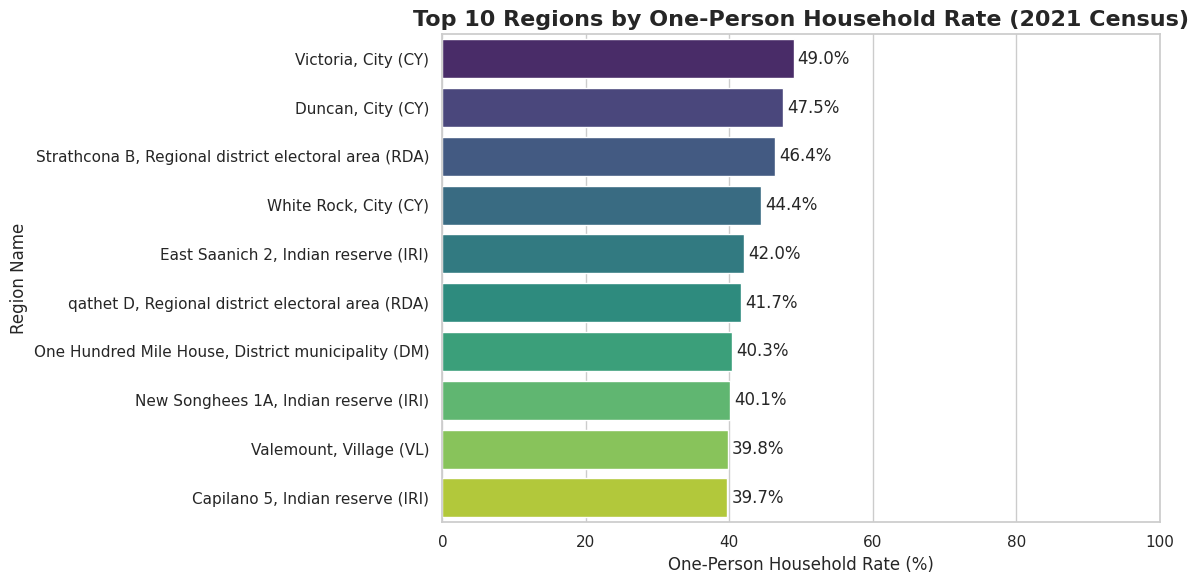

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")

# ---------------------------------------------------------
# 1. Bar Chart: Top Regions by One-Person Household Rate
# ---------------------------------------------------------
print("--- Generating Bar Chart ---")

# Execute the ranking query defined in the previous step
df_rank_spark = spark.sql(ranking_query)

# Convert Spark DataFrame to Pandas DataFrame for plotting
# Note: This is efficient because the result set is small (Limit 10)
pdf_rank = df_rank_spark.toPandas()

# Initialize the figure
plt.figure(figsize=(12, 6))

# Create Bar Plot
chart = sns.barplot(
    data=pdf_rank,
    x="One_Person_Rate_Percent", # Corrected column name
    y="Region_Name",             # Corrected column name
    palette="viridis",
    hue="Region_Name",
    legend=False
)

# Customize Layout
plt.title("Top 10 Regions by One-Person Household Rate (2021 Census)", fontsize=16, fontweight='bold')
plt.xlabel("One-Person Household Rate (%)", fontsize=12)
plt.ylabel("Region Name", fontsize=12)
plt.xlim(0, 100)  # Set x-axis limit to 100%

# Add value labels to the end of each bar
for container in chart.containers:
    chart.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

---------------------------------------------------------
2. SQL Query: Health Region (HR) Ranking
---------------------------------------------------------
Objective:
  Calculate the percentage of one-person households for each Health Region (HR)
  in British Columbia using the specific HR dataset (df2).

Logic:
- Extract Numerator (ID 110) and Denominator (ID 50) from the HR dataset.
- Filter for British Columbia (Code starts with '59').
- Calculate the rate and rank the regions.
---------------------------------------------------------

In [48]:
hr_ranking_query = """
WITH HR_OnePerson AS (
    -- Extract One-Person Household counts (Numerator) from HR dataset
    SELECT
        DGUID,
        GEO_NAME,
        C1_COUNT_TOTAL AS One_Person_Count
    FROM census_data2
    WHERE CHARACTERISTIC_ID = 110
      -- Adjust 'Health region' below if the check in Step 0 showed a different string
      AND GEO_LEVEL = 'Health region'
      AND CAST(ALT_GEO_CODE AS STRING) LIKE '59%' -- BC Only
),

HR_TotalHouseholds AS (
    -- Extract Total Household counts (Denominator) from HR dataset
    SELECT
        DGUID,
        C1_COUNT_TOTAL AS Total_Household_Count
    FROM census_data2
    WHERE CHARACTERISTIC_ID = 50
      AND GEO_LEVEL = 'Health region'
      AND CAST(ALT_GEO_CODE AS STRING) LIKE '59%'
),

HR_CalculatedRates AS (
    -- Join and calculate rates
    SELECT
        op.GEO_NAME AS HR_Name,
        op.One_Person_Count,
        th.Total_Household_Count,
        (CAST(op.One_Person_Count AS DOUBLE) / th.Total_Household_Count * 100) AS HR_One_Person_Rate
    FROM HR_OnePerson op
    JOIN HR_TotalHouseholds th ON op.DGUID = th.DGUID
)

-- Final Selection: Rank Health Regions
SELECT
    HR_Name,
    ROUND(HR_One_Person_Rate, 2) AS One_Person_Rate_Percent,
    Total_Household_Count,
    RANK() OVER (ORDER BY HR_One_Person_Rate DESC) as Rank
FROM HR_CalculatedRates
ORDER BY HR_One_Person_Rate DESC
"""

print("--- SQL Result: Ranking by Health Region (BC) ---")
spark.sql(hr_ranking_query).show(truncate=False)

--- SQL Result: Ranking by Health Region (BC) ---
+--------------------------------------------------------+-----------------------+---------------------+----+
|HR_Name                                                 |One_Person_Rate_Percent|Total_Household_Count|Rank|
+--------------------------------------------------------+-----------------------+---------------------+----+
|Vancouver Health Service Delivery Area                  |39.05                  |313445.0             |1   |
|South Vancouver Island Health Service Delivery Area     |33.74                  |185205.0             |2   |
|Kootenay-Boundary Health Service Delivery Area          |32.49                  |37400.0              |3   |
|North Vancouver Island Health Service Delivery Area     |29.99                  |58045.0              |4   |
|Northeast Health Service Delivery Area                  |29.98                  |26665.0              |5   |
|Northwest Health Service Delivery Area                  |29.72       

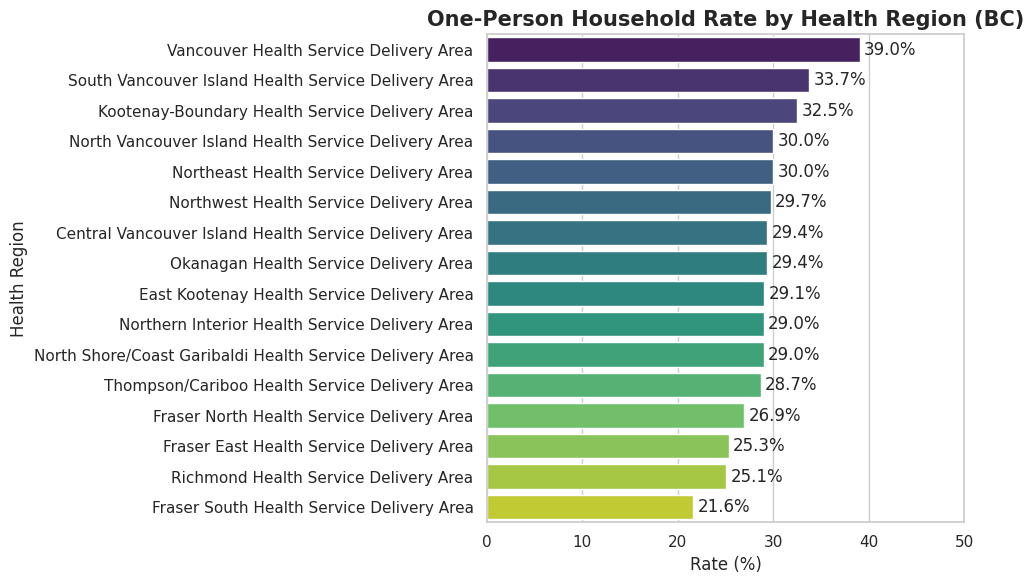

In [49]:
# ---------------------------------------------------------
# Data Preparation for Visualization
# ---------------------------------------------------------
# 1. Get HR Data (from df2 query above)
df_hr_rank_spark = spark.sql(hr_ranking_query)
pdf_hr_rank = df_hr_rank_spark.toPandas()

# 2. Get CSD Data (re-using the query from the previous step)
#    (Assumes 'ranking_query' from the previous chat is already defined)
df_csd_rank_spark = spark.sql(ranking_query)
pdf_csd_rank = df_csd_rank_spark.toPandas()

# ---------------------------------------------------------
# 2: Health Region Ranking (Bar Chart)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
chart_hr = sns.barplot(
    data=pdf_hr_rank,
    x="One_Person_Rate_Percent",
    y="HR_Name",
    palette="viridis",
    hue="HR_Name",
    legend=False
)

plt.title("One-Person Household Rate by Health Region (BC)", fontsize=15, fontweight='bold')
plt.xlabel("Rate (%)", fontsize=12)
plt.ylabel("Health Region", fontsize=12)
plt.xlim(0, 50) # Adjusted based on typical range

for container in chart_hr.containers:
    chart_hr.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()



---------------------------------------------------------
3. Distribution Comparison (CSD vs. HR)
---------------------------------------------------------
Objective: Compare the statistical distribution of one-person household rates across individual municipalities (CSDs) against the aggregated averages of Health Regions (HRs) to highlight local variances and outliers.

Logic:

- Visualizing CSD Data: Plot a histogram with a Kernel Density Estimate (KDE) curve using the CSD dataset to visualize the frequency and spread of household rates across the province.

- Overlaying HR Averages: Iterate through the Health Region dataset to plot vertical dashed lines, representing the weighted average rate for each specific region.

- Dynamic Scaling: Calculate the minimum and maximum values from both datasets combined to dynamically adjust the X-axis limits, ensuring all outliers and regional averages are fully visible.

--- Fetching data for ALL CSDs in BC ---
Total Municipalities (CSDs) loaded: 537


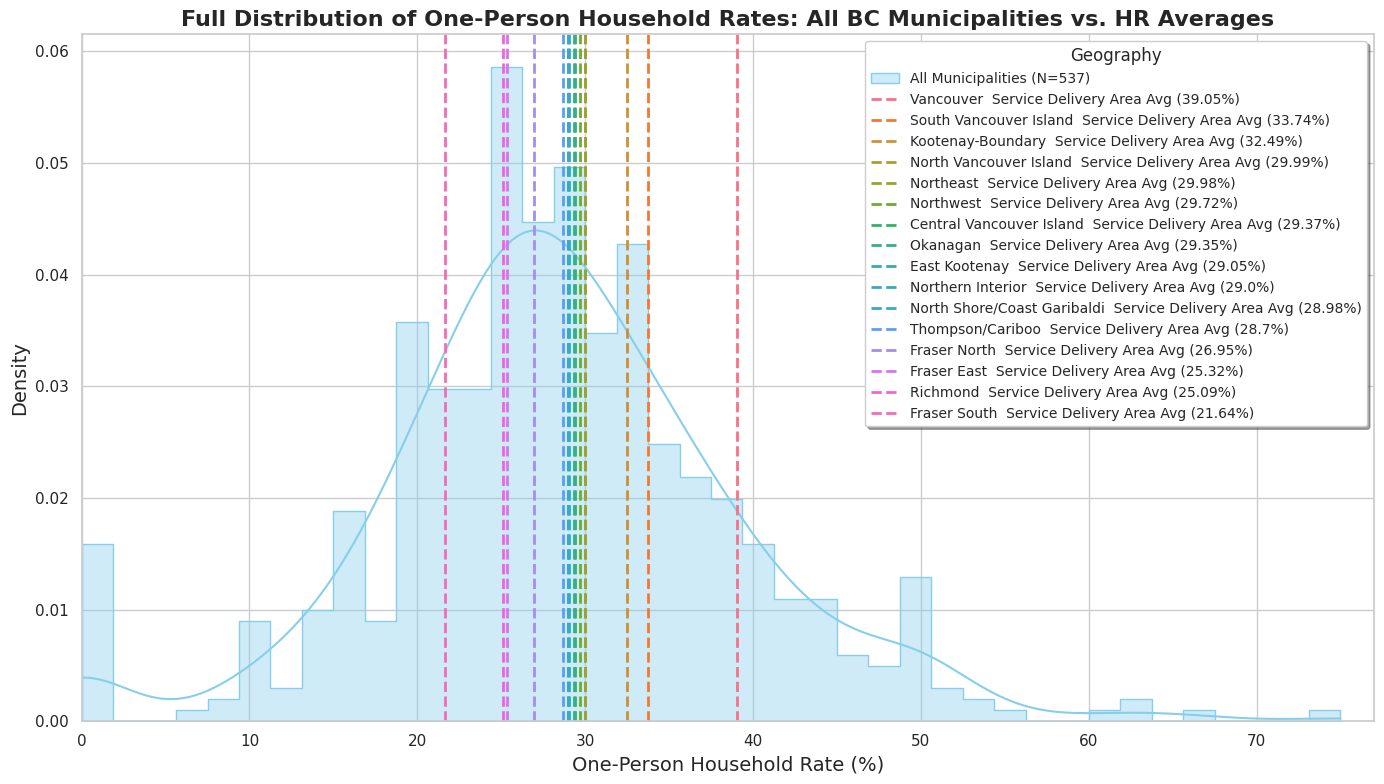

In [50]:
# ---------------------------------------------------------
# Step 1: Get Data for ALL CSDs (Remove LIMIT)
# ---------------------------------------------------------
# We modify the query to fetch all municipalities in BC, not just the top 10.
# We also lower the household threshold to include smaller communities if desired.

ranking_query_all = """
WITH OnePerson AS (
    SELECT
        DGUID,
        GEO_NAME,
        C1_COUNT_TOTAL AS One_Person_Count
    FROM census_data1
    WHERE CHARACTERISTIC_ID = 110
      AND GEO_LEVEL = 'Census subdivision'
      AND CAST(ALT_GEO_CODE AS STRING) LIKE '59%' -- BC Only
),

TotalHouseholds AS (
    SELECT
        DGUID,
        C1_COUNT_TOTAL AS Total_Household_Count
    FROM census_data1
    WHERE CHARACTERISTIC_ID = 50
      AND GEO_LEVEL = 'Census subdivision'
      AND CAST(ALT_GEO_CODE AS STRING) LIKE '59%'
),

CalculatedRates AS (
    SELECT
        op.DGUID,
        op.GEO_NAME,
        op.One_Person_Count,
        th.Total_Household_Count,
        (CAST(op.One_Person_Count AS DOUBLE) / th.Total_Household_Count * 100) AS One_Person_Rate_Percent
    FROM OnePerson op
    JOIN TotalHouseholds th ON op.DGUID = th.DGUID
)

SELECT
    GEO_NAME AS Region_Name,
    ROUND(One_Person_Rate_Percent, 2) AS One_Person_Rate_Percent,
    Total_Household_Count
FROM CalculatedRates
WHERE Total_Household_Count > 0 -- Ensure we include all regions with data
-- NO LIMIT clause here!
"""

# Execute query and convert to Pandas
print("--- Fetching data for ALL CSDs in BC ---")
df_csd_all_spark = spark.sql(ranking_query_all)
pdf_csd_all = df_csd_all_spark.toPandas()

print(f"Total Municipalities (CSDs) loaded: {len(pdf_csd_all)}")

# ---------------------------------------------------------
# Step 2: Visualization with Full Data
# ---------------------------------------------------------
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# 1. Plot Histogram for ALL CSDs
sns.histplot(
    data=pdf_csd_all,
    x="One_Person_Rate_Percent",
    kde=True,
    color="skyblue",
    label=f"All Municipalities (N={len(pdf_csd_all)})",
    stat="density",
    bins=40, # Increase bins to see finer details in the distribution
    element="step",
    alpha=0.4
)

# 2. Overlay Vertical Lines for Health Region (HR) Averages
# (Assuming pdf_hr_rank is already available from the previous step)
if 'pdf_hr_rank' in locals() and not pdf_hr_rank.empty:
    colors = sns.color_palette("husl", len(pdf_hr_rank))
    for index, row in pdf_hr_rank.iterrows():
        short_name = row['HR_Name'].replace('Health', '').replace('Authority', '').strip()

        plt.axvline(
            x=row["One_Person_Rate_Percent"],
            color=colors[index],
            linestyle='--',
            linewidth=2,
            label=f"{short_name} Avg ({row['One_Person_Rate_Percent']}%)"
        )
else:
    print("Note: HR ranking data (pdf_hr_rank) not found. Only plotting CSDs.")

# 3. Dynamic X-Axis Scaling
# Adjust range to fit all data points + HR lines
all_values = list(pdf_csd_all["One_Person_Rate_Percent"])
if 'pdf_hr_rank' in locals() and not pdf_hr_rank.empty:
    all_values += list(pdf_hr_rank["One_Person_Rate_Percent"])

if all_values:
    plt.xlim(max(0, min(all_values) - 2), max(all_values) + 2)

# 4. Final Layout
plt.title("Full Distribution of One-Person Household Rates: All BC Municipalities vs. HR Averages",
          fontsize=16, fontweight='bold')
plt.xlabel("One-Person Household Rate (%)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Geography", loc='best', fontsize=10, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

---------------------------------------------------------
4. SQL Query: Correlation Data Preparation
---------------------------------------------------------
Objective: Prepare a dataset to analyze the correlation between
           One-person households and Low-income rates (LIM-AT).
Logic:
  - CTE 1: Re-calculate One-Person rates using a Self-Join approach.
  - CTE 2: Extract Low-Income Rate (ID 345).
  - Final Select: Inner Join to align metrics by DGUID.

In [51]:

correlation_query = """
WITH HouseholdData AS (
    -- Calculate One-Person Rate (Self-Join within the CTE)
    SELECT
        A.DGUID,
        (CAST(A.C1_COUNT_TOTAL AS DOUBLE) / B.C1_COUNT_TOTAL * 100) AS One_Person_Rate
    FROM census_data1 A
    JOIN census_data1 B ON A.DGUID = B.DGUID
    WHERE A.CHARACTERISTIC_ID = 110 -- One-person households
      AND B.CHARACTERISTIC_ID = 50  -- Total households
),
LowIncomeData AS (
    -- Extract Low-Income Rate (LIM-AT)
    -- Note: ID 345 stores the percentage in 'C10_RATE_TOTAL' (or C1_COUNT depending on structure)
    SELECT
        DGUID,
        CAST(C10_RATE_TOTAL AS DOUBLE) AS Low_Income_Rate
    FROM census_data1
    WHERE CHARACTERISTIC_ID = 345
)
-- Combine metrics for correlation analysis
SELECT
    h.One_Person_Rate,
    l.Low_Income_Rate
FROM HouseholdData h
JOIN LowIncomeData l ON h.DGUID = l.DGUID
WHERE h.One_Person_Rate IS NOT NULL
  AND l.Low_Income_Rate IS NOT NULL
"""

print("\n--- SQL Result: Data Prepared for Scatter Plot ---")
df_sql_corr = spark.sql(correlation_query)
df_sql_corr.show(5)

# Next Step: Convert to Pandas for visualization
# pdf_corr = df_sql_corr.toPandas()


--- SQL Result: Data Prepared for Scatter Plot ---
+------------------+---------------+
|   One_Person_Rate|Low_Income_Rate|
+------------------+---------------+
| 33.33333333333333|           16.5|
|  30.5993690851735|            6.9|
|30.434782608695656|            7.6|
|30.952380952380953|            8.8|
| 27.77777777777778|            7.6|
+------------------+---------------+
only showing top 5 rows




--- Generating Scatter Plot ---


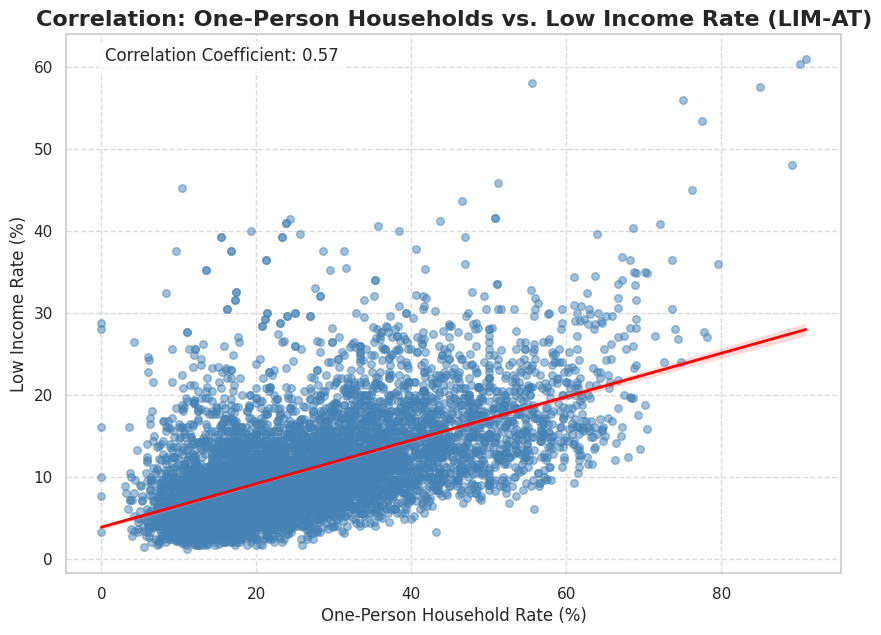

In [52]:
# visalization

print("\n--- Generating Scatter Plot ---")

# Execute the correlation query
df_corr_spark = spark.sql(correlation_query)

# Convert to Pandas
# Note: For very large datasets, consider using .sample() in Spark before converting
pdf_corr = df_corr_spark.toPandas()

# Initialize the figure
plt.figure(figsize=(10, 7))

# Create Scatter Plot with Regression Line
sns.regplot(
    data=pdf_corr,
    x="One_Person_Rate",
    y="Low_Income_Rate",
    scatter_kws={'alpha': 0.5, 's': 30}, # Adjust transparency and dot size
    line_kws={'color': 'red', 'linewidth': 2}, # Highlight trend line
    color='steelblue'
)

# Customize Layout
plt.title("Correlation: One-Person Households vs. Low Income Rate (LIM-AT)", fontsize=16, fontweight='bold')
plt.xlabel("One-Person Household Rate (%)", fontsize=12)
plt.ylabel("Low Income Rate (%)", fontsize=12)

# Calculate and display correlation coefficient (Pearson)
corr_coef = pdf_corr['One_Person_Rate'].corr(pdf_corr['Low_Income_Rate'])
plt.text(
    x=0.05, y=0.95,
    s=f'Correlation Coefficient: {corr_coef:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()